# Neural networks

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
orig_X, y = fetch_openml("mnist_784", version=1, return_X_y=True,
                         as_frame=False, parser="pandas")
orig_X.shape, y.shape, np.min(orig_X), np.max(orig_X)

((70000, 784), (70000,), 0, 255)

5


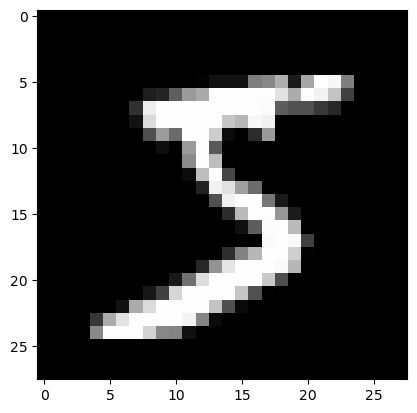

In [3]:
print(y[0])
plt.imshow(orig_X[0].reshape((28,28)), cmap="gray", vmin=0, vmax=255)

In [4]:
X = orig_X / 255

np.max(X)

1.0

5


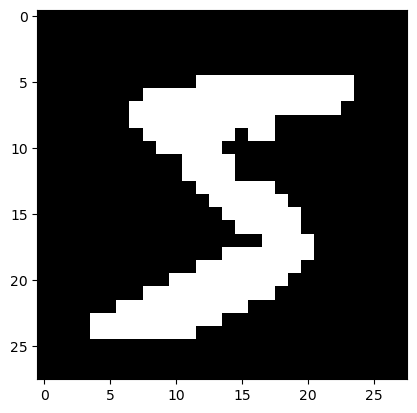

In [5]:
print(y[0])
plt.imshow(orig_X[0].reshape((28,28)), cmap="gray", vmin=0.0, vmax=1.0)

In [6]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver="sgd", verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [11]:
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print("\n",mlp.score(X_test, y_test))

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

In [12]:
[coef.shape for coef in mlp.coefs_]

[(784, 50), (50, 10)]

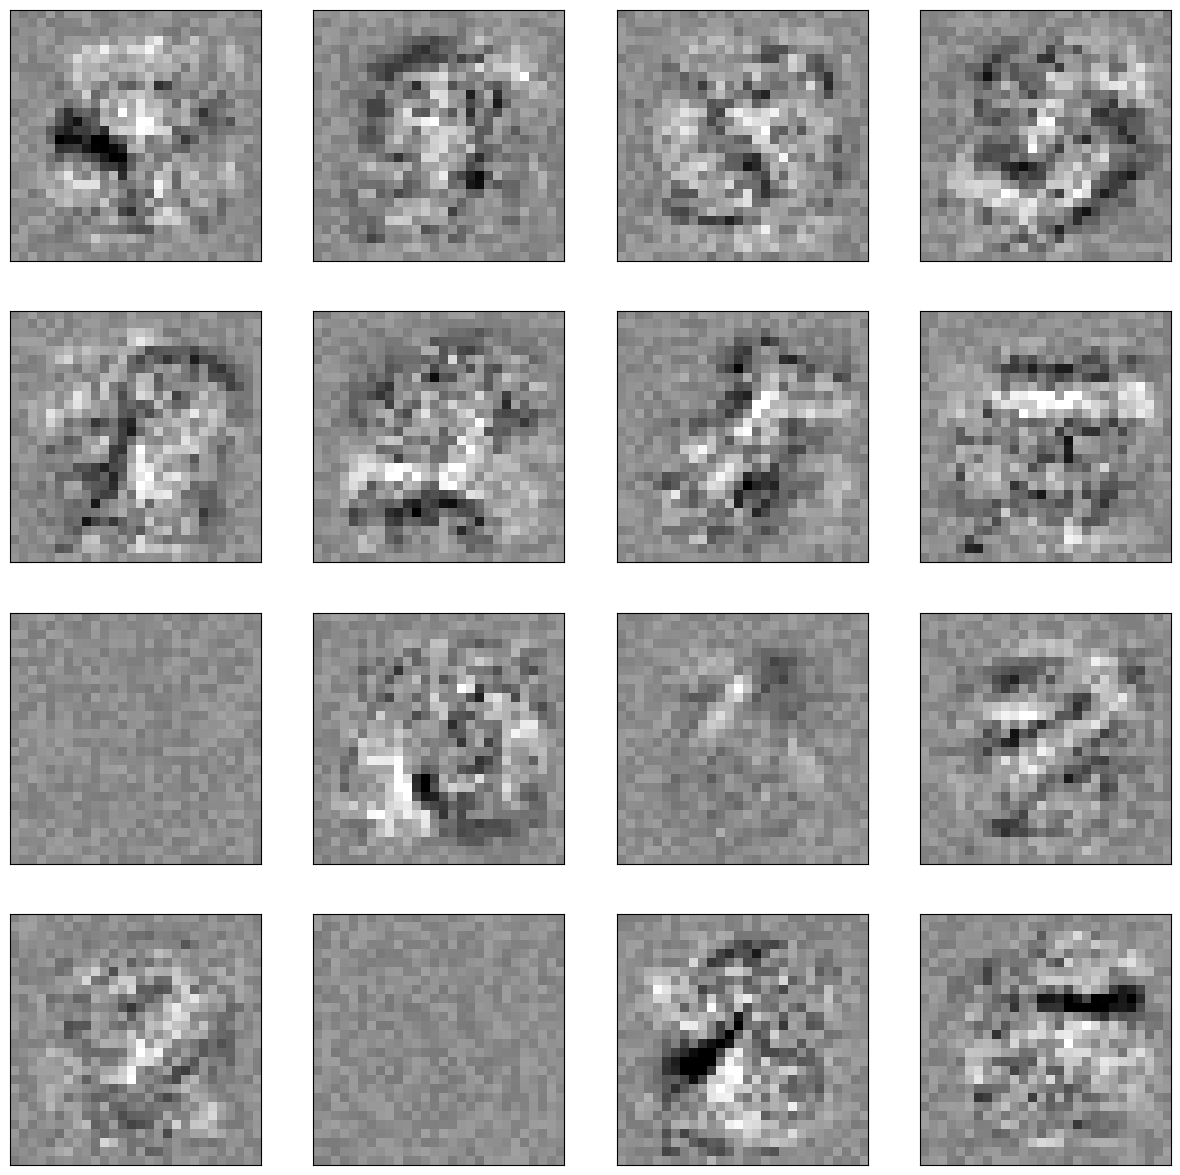

In [13]:
fig, axes = plt.subplots(4,4)
fig.set_size_inches((15,15))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=.5 * vmin,
             vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## Example with Social Network Ads

In [14]:
import pandas as pd
import numpy as np

sna = pd.read_csv("Social_Network_Ads.csv")
sna.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
x =  sna.iloc[:, [2,3]].values
y = sna.iloc[:, 4].values

In [16]:
x.shape, y.shape

((400, 2), (400,))

In [17]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)

x_std[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_std,y, test_size=.2,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(320, 80, 320, 80)

In [19]:
classificador = MLPClassifier(solver="sgd", hidden_layer_sizes=(4),
                              max_iter=3000, random_state=42)
classificador.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=4, max_iter=3000, random_state=42,
              solver='sgd')

In [20]:
y_pred = classificador.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [21]:
[coef.shape for coef in classificador.coefs_]

[(2, 4), (4, 1)]

<Axes: >

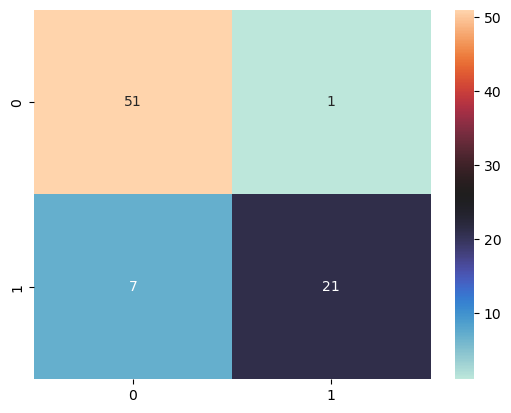

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mc = confusion_matrix(y_test, y_pred)
sns.heatmap(mc, cmap="icefire", annot=True)

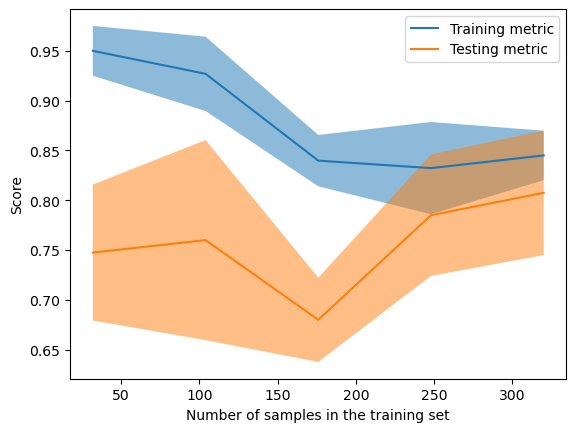

In [23]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(classificador, X=x_std, y=y,
                                    score_type="both")

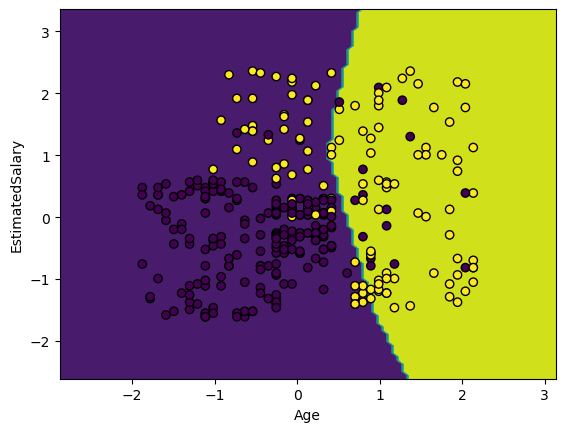

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(classificador, x_train,
                                              response_method="predict",
                                              xlabel="Age",
                                              ylabel="EstimatedSalary")
disp.ax_.scatter(x_train[:,0],x_train[:,1], c=y_train, edgecolor="k")